Linear Regression Task part 2. The data used in this task is from a filter testing duct that has 4 air filters and operates under similar conditions that an actual swine farm would with filters. The objective is to be able to predict the airflow of the fan from common and easy to monitor quantities. The data is downlaoded in 6 day and 22 hour chunks. For this task I will just read one of the files from the year's worth of data that has been collected. This particular file is from week prior to the Polar Vortex in 2019. I didn't plan to grab that one, but I some how did. The question I am addressing with this assignment is there an effective method to predict the actual fan airflow based on the properties recorded within this dataset. For this I will evaluate the R^2 and the residual patterns.

In [46]:
import pandas as pd
import seaborn as sns
data= pd.read_csv("Filter_Fan_Data.csv", sep =';', parse_dates=[['59@46@','10000']])
data.head()
data.columns = ['Date_Time','Fan%_ct','Fan%_Act','Maxm3/h','fandpPa','FilterdpPa','FanPkWh','Duct tempC']
data.head()

,Date_Time,Fan%_ct,Fan%_Act,Maxm3/h,fandpPa,FilterdpPa,FanPkWh,Duct tempC
0,2019-01-23 12:00:01,15,15,5835,25,6,329.0,-2.3
1,2019-01-23 12:01:01,15,15,5835,25,7,330.0,-2.3
2,2019-01-23 12:02:01,15,14,5835,26,6,330.0,-2.2
3,2019-01-23 12:03:01,15,17,5835,26,8,331.0,-2.2
4,2019-01-23 12:04:01,15,17,5835,25,8,331.0,-2.3


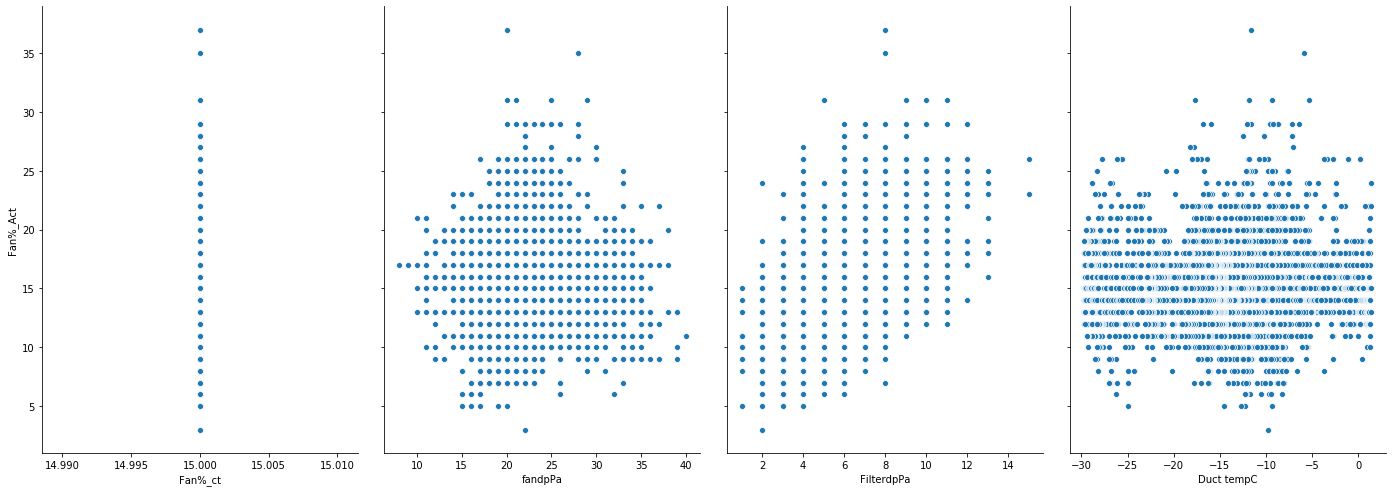

In [47]:
#Visualize data prior to transformations
sns.pairplot(data, x_vars=['Fan%_ct','fandpPa','FilterdpPa','Duct tempC'], y_vars='Fan%_Act', height=7, aspect=0.7)

In [48]:
#transform the fan actual from percent to m3/h to then cfm
data['fanm3/h_act']= (data['Fan%_Act']/100)*data['Maxm3/h']
data.head()
data['fancfm_Act']= data['fanm3/h_act']/1.69901082
data.head()

,Date_Time,Fan%_ct,Fan%_Act,Maxm3/h,fandpPa,FilterdpPa,FanPkWh,Duct tempC,fanm3/h_act,fancfm_Act
0,2019-01-23 12:00:01,15,15,5835,25,6,329.0,-2.3,875.25,515.152693
1,2019-01-23 12:01:01,15,15,5835,25,7,330.0,-2.3,875.25,515.152693
2,2019-01-23 12:02:01,15,14,5835,26,6,330.0,-2.2,816.90,480.809180
3,2019-01-23 12:03:01,15,17,5835,26,8,331.0,-2.2,991.95,583.839719
4,2019-01-23 12:04:01,15,17,5835,25,8,331.0,-2.3,991.95,583.839719


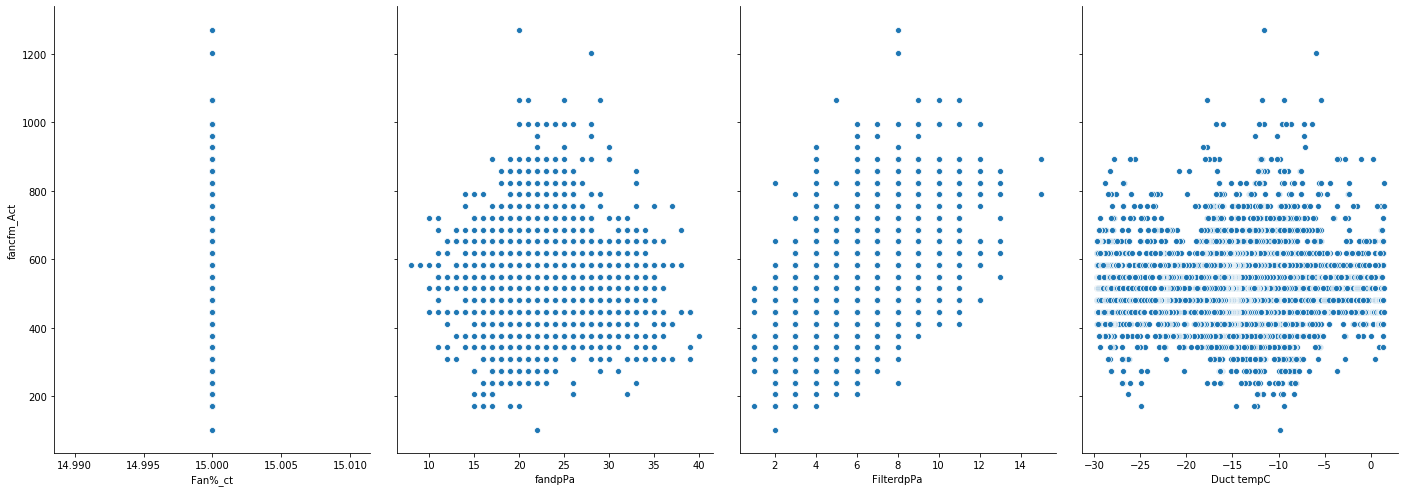

In [49]:
sns.pairplot(data, x_vars=['Fan%_ct','fandpPa','FilterdpPa','Duct tempC'], y_vars='fancfm_Act', height=7, aspect=0.7)

In [50]:
#fit data for the X and y data for the first model with all inputs.
from sklearn.linear_model import LinearRegression
x_data=data.drop(['Date_Time','Fan%_Act','Maxm3/h','FanPkWh','fanm3/h_act','fancfm_Act'],axis = 1)
x_data.shape

(10000, 4)

In [51]:
y_data= data['fancfm_Act']
y_data.shape

(10000,)

In [52]:
import statsmodels.api as sm

In [53]:
model2 = sm.OLS(y_data,x_data).fit()
model2.params

Fan%_ct       17.745111
fandpPa        0.816166
FilterdpPa    34.409765
Duct tempC    -1.345617
dtype: float64

In [54]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             fancfm_Act   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1226.
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:54:36   Log-Likelihood:                -57307.
No. Observations:               10000   AIC:                         1.146e+05
Df Residuals:                    9996   BIC:                         1.147e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Fan%_ct       17.7451      0.413     42.943      0.0

In [58]:
#create a column of residuals act minus the predicted
data['fancfmres']=data['fancfm_Act']-model2.fittedvalues
data.head()

,Date_Time,Fan%_ct,Fan%_Act,Maxm3/h,fandpPa,FilterdpPa,FanPkWh,Duct tempC,fanm3/h_act,fancfm_Act,fancfmres
0,2019-01-23 12:00:01,15,15,5835,25,6,329.0,-2.3,875.25,515.152693,19.018358
1,2019-01-23 12:01:01,15,15,5835,25,7,330.0,-2.3,875.25,515.152693,-15.391407
2,2019-01-23 12:02:01,15,14,5835,26,6,330.0,-2.2,816.90,480.809180,-16.006759
3,2019-01-23 12:03:01,15,17,5835,26,8,331.0,-2.2,991.95,583.839719,18.204249
4,2019-01-23 12:04:01,15,17,5835,25,8,331.0,-2.3,991.95,583.839719,18.885854


Text(0, 0.5, 'REsidual of Predicted CFM')

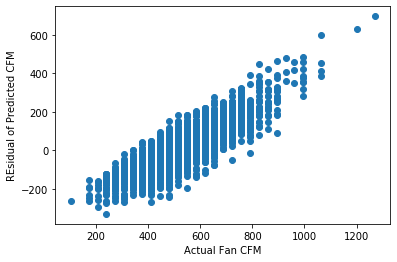

In [59]:
#plot the residuals fo this model
x=data['fancfm_Act']
y=data['fancfmres']
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('Actual Fan CFM')
plt.ylabel('REsidual of Predicted CFM')

The model based on all the input data is not the greatest. The R-square value is is 0.269. Looking at the pairplot there are some issues with the relationship between the input variables and the target value. Based on these results I am going to try dropping the fan%_ct, duct temperature from the input variable list and retrain the model to see is it improves the accuracy and the residuals as there is an obvious trend in the residuals from the model.


In [60]:
data.head()

,Date_Time,Fan%_ct,Fan%_Act,Maxm3/h,fandpPa,FilterdpPa,FanPkWh,Duct tempC,fanm3/h_act,fancfm_Act,fancfmres
0,2019-01-23 12:00:01,15,15,5835,25,6,329.0,-2.3,875.25,515.152693,19.018358
1,2019-01-23 12:01:01,15,15,5835,25,7,330.0,-2.3,875.25,515.152693,-15.391407
2,2019-01-23 12:02:01,15,14,5835,26,6,330.0,-2.2,816.90,480.809180,-16.006759
3,2019-01-23 12:03:01,15,17,5835,26,8,331.0,-2.2,991.95,583.839719,18.204249
4,2019-01-23 12:04:01,15,17,5835,25,8,331.0,-2.3,991.95,583.839719,18.885854


In [61]:
# Fit data to test a second model in SKLearn and StatsModel
x_data1=data.drop(['Date_Time','Fan%_Act','Fan%_ct','Maxm3/h','FanPkWh','fanm3/h_act','fancfm_Act','Duct tempC','fancfmres'],axis = 1)
x_data1.shape
x_data1.head()

,fandpPa,FilterdpPa
0,25,6
1,25,7
2,26,6
3,26,8
4,25,8


In [62]:
y_data1= data['fancfm_Act']
y_data1.shape

(10000,)

In [63]:
model = LinearRegression()
model.fit(x_data1, y_data1)
model.coef_

array([ 1.22632648, 32.55346433])

In [64]:
print(model.score(x_data1,y_data1))

0.2598623558284362


In [65]:
y_pred = model.predict(x_data1)
y_pred

array([513.1943491 , 545.74781343, 514.42067558, ..., 513.1943491 ,
       544.52148696, 480.64088477])

Text(0.5, 1.0, 'Model 2 True CFM vs. predicted CFM SKILearn')

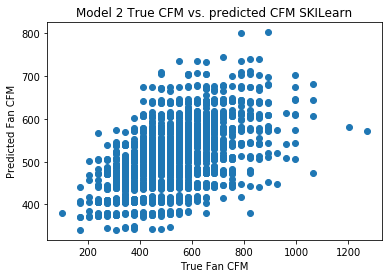

In [66]:
import matplotlib.pyplot as plt
plt.scatter(y_data1, y_pred)
plt.xlabel('True Fan CFM')
plt.ylabel('Predicted Fan CFM')
plt.title('Model 2 True CFM vs. predicted CFM SKILearn')


In [68]:
#Fit the OLS model for the StatsModel Package
model1 = sm.OLS(y_data1,x_data1).fit()
model1.params
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:             fancfm_Act   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          1.942e+05
Date:                Sun, 06 Oct 2019   Prob (F-statistic):                        0.00
Time:                        14:58:33   Log-Likelihood:                         -58419.
No. Observations:               10000   AIC:                                  1.168e+05
Df Residuals:                    9998   BIC:                                  1.169e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [69]:
data['fancfmres1']=data['fancfm_Act']-model1.fittedvalues
data.head()

,Date_Time,Fan%_ct,Fan%_Act,Maxm3/h,fandpPa,FilterdpPa,FanPkWh,Duct tempC,fanm3/h_act,fancfm_Act,fancfmres,fancfmres1
0,2019-01-23 12:00:01,15,15,5835,25,6,329.0,-2.3,875.25,515.152693,19.018358,2.902712
1,2019-01-23 12:01:01,15,15,5835,25,7,330.0,-2.3,875.25,515.152693,-15.391407,-43.001485
2,2019-01-23 12:02:01,15,14,5835,26,6,330.0,-2.2,816.90,480.809180,-16.006759,-40.913794
3,2019-01-23 12:03:01,15,17,5835,26,8,331.0,-2.2,991.95,583.839719,18.204249,-29.691648
4,2019-01-23 12:04:01,15,17,5835,25,8,331.0,-2.3,991.95,583.839719,18.885854,-20.218656


Text(0, 0.5, 'REsidual of Predicted CFM model 2')

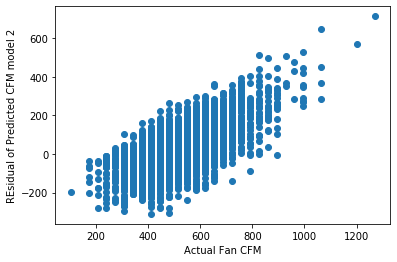

In [70]:
x=data['fancfm_Act']
y=data['fancfmres1']
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('Actual Fan CFM')
plt.ylabel('REsidual of Predicted CFM model 2')

Based on the results of this second model as expected as effects were dropped out the R^2 was reducded. Knowing that this data was from January 2019 the ventilation rate of the duct was not varying, though the actual ventilation rate was noted to vary. This has to be caused by wind during the time frame utilized in the task. The second OLS model that has the same inputs as the linear regression model was showing a higher R^2 values. There is still a pattern in the residuals, so the model still has issues. The addition of the wind direction and speed would be a great addition to examine in the future of this project.